# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#loading the train data set
train_df = pd.read_csv('df_train.csv')
# loading the test data set
test_df = pd.read_csv('df_test.csv')

In [3]:
# combining them into one data set for cleaning purposes
frames = [train_df, test_df]
combined_df = pd.concat(frames)

<a id="four"></a>
## 4. Data Engineering And Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Overview of the first five and last five contents of the combined data set

In [102]:
# first five rows
combined_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [103]:
#last five rows
combined_df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


We now correct the indexing because it is somewhat wrong. 

In [104]:
# set the first column to be the index
combined_df = combined_df.set_index('Unnamed: 0')

In [105]:
# another look at the data set
combined_df.tail()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [106]:
combined_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


So it's looking good right now.

Let's find out what data types the features have. We want only numerical data types for the regression model.

In [107]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h  

We can see from above that the dataframe has 3 categorical variables: time, valencia_wind_deg, and Seville_pressure, while the rest are numerical variables consisting of floats or integers. 
As a start, I will deal with the categorical variables first before looking at the numerical variables because in regression, the emphasis is on numerical variables. 

# 4.1 Time Feature - Data Cleaning

In [109]:
# how many rows and colums
combined_df['time'].unique().shape

(11683,)

In [110]:
# Are there missing values
combined_df['time'].isnull().sum()

0

In [111]:
# first five entries
combined_df['time'].head()

Unnamed: 0
0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
2    2015-01-01 09:00:00
3    2015-01-01 12:00:00
4    2015-01-01 15:00:00
Name: time, dtype: object

In [112]:
# last five entries
combined_df['time'].tail()

Unnamed: 0
11678    2018-12-31 09:00:00
11679    2018-12-31 12:00:00
11680    2018-12-31 15:00:00
11681    2018-12-31 18:00:00
11682    2018-12-31 21:00:00
Name: time, dtype: object

The next step is to convert the time to a datetime data type and extract the relevant features

In [115]:
# convert the time variable to a datetime datatype
combined_df['time'] = pd.to_datetime(combined_df['time'])

In [118]:
# extract relevant metrics like year, month, weekday, hour from the time feature
combined_df['Year'] = combined_df['time'].dt.year
# extract month
combined_df['Month'] = combined_df['time'].dt.month
# extract weekday
combined_df['Weekday'] = combined_df['time'].dt.dayofweek
# extract hour from the time feature
combined_df['Hour'] = combined_df['time'].dt.hour



In [121]:
# we now drop the time feature since the relevant metrics have been extracted
combined_df.drop("time", axis=1, inplace=True)
combined_df.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,3
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,6


The second categorical feature that needs to be encoded is the Valencia Wind Degree.

In [122]:
# get all the unique values in the feature
combined_df['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

We can see that the feature is made of levels. That means it is an ordinal feature. So, we only need to extract the numerical values from the strings and encode it as the values. Then convert the datatype to int since it will still be an object. 

In [140]:
# encode the Valencia_wind_deg values as numbers
combined_df['Valencia_wind_deg'] = combined_df['Valencia_wind_deg'].str.extract(r'(\d+$)')


In [141]:
# convert the data type to numeric
combined_df["Valencia_wind_deg"] = pd.to_numeric(combined_df["Valencia_wind_deg"])

In [142]:
combined_df["Valencia_wind_deg"].head()

Unnamed: 0
0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: int64

The third categorical feature is Seville Pressure

In [125]:
# what unique features are its values
combined_df["Seville_pressure"].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

We can see that the values are ranked. So we need to encode them as numbers. 

In [143]:
# encode the Valencia_wind_deg values as numbers
combined_df['Seville_pressure'] = combined_df['Seville_pressure'].str.extract(r'(\d+$)')


In [144]:
# convert the data type to numeric
combined_df["Seville_pressure"] = pd.to_numeric(combined_df["Seville_pressure"])

Let's find out if any other features are categorical or we are through with encoding.

In [146]:
# let's find out
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  int64  
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure   

# 4.2 Missing Values
Right now, there are no categorical variables. The data set is composed solely of numerical features which is needed for the regression model. So let's search for missing values in the data set. 

In [148]:
# searching for missing values or NaN
combined_df.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

The output shows that only Valencia_pressure has missing values. The missing values for load_shortfall_3h is because we merged the train and test datasets. When we unmerge them, this will disappear. 

Let's see if the feature has outliers

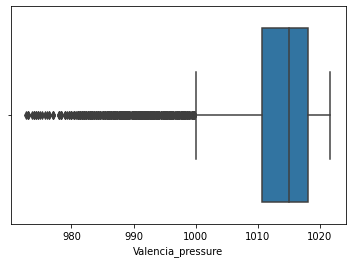

In [149]:
ax = sns.boxplot(x="Valencia_pressure", data=combined_df)

The box plot above shows that the feature has a lot of outliers so we cannot use the mean. Since pressure is somewhat based on high or low levels, it is better to use the mode rather than the median. So we will impute the missing values based on the mode.

In [150]:
# impute missing values using mode
combined_df["Valencia_pressure"].fillna(combined_df["Valencia_pressure"].mode()[0], inplace=True)

Let's see if there are any missing values. 

In [151]:
combined_df.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

Missing values is taken care of. 

Now we need to unmerge what we merged. That is, we need to separate the train data set from the test data set. 

In [152]:
# code to separate the test data set
test_clean_df = combined_df[combined_df["load_shortfall_3h"].isnull()]

In [ ]:
# drop the response column. It is all nulls
test_clean_df = test_clean_df.drop("load_shortfall_3h", axis=1)

In [158]:
# check what the combined dataframe contains
combined_df.shape

(11683, 51)

It still contains the test data frame. So we need to drop all reference to the test data set to have a single train data set. 

In [159]:
train_clean_df = combined_df[combined_df["load_shortfall_3h"].notnull()]

In [160]:
train_clean_df.shape

(8763, 51)

compare with shape for test

In [161]:
test_clean_df.shape

(2920, 50)

So, we have our data sets backs. We can now move on to modelling phase of the data science project. 

Let's pickle the train and test data so far. So that one can take a break. 

In [165]:
# store the data in a dictionary
dict_store = {"train_clean_df": train_clean_df, "test_clean_df": test_clean_df}


In [166]:
import pickle

model_save_path = "first_save.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(dict_store,file)

Welcome Back from the break. We can now unpickle the train and test data set. 

In [4]:
import pickle
model_load_path = "first_save.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

We will now get back our train and test data sets from the model

In [5]:
train_clean_df = unpickled_model["train_clean_df"]

In [7]:
test_clean_df = unpickled_model["test_clean_df"]

# 4.6 Exploratory Data Analysis

After Data Cleaning is exploratory data analysis (EDA). For the EDA, we will first start with the categorical variables that were encoded as numeric variables. 

## EDA on the time-derived features

The time derived features are year, month, weekday and hour. An EDA of the relationship of these festures with the response variable, load_shortfall_3h, can give us insight about the data and what to expect from the modeling. 

### 4.6.1 Load shortfall versus month and year

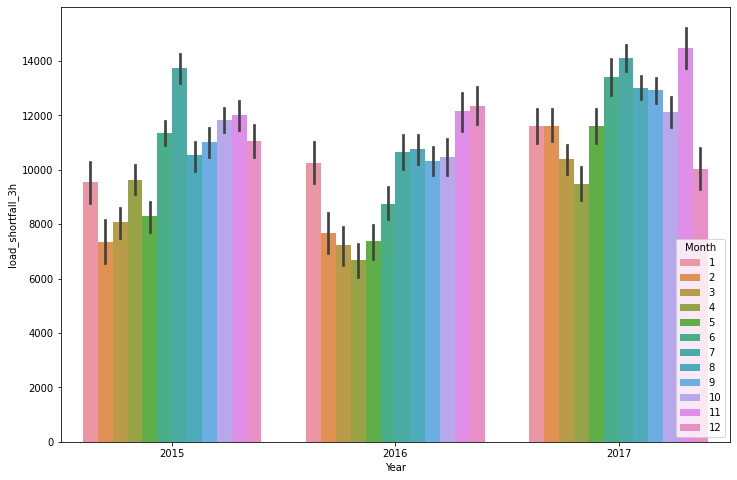

In [9]:
# multiple bar barchat showing the relationship of load shortfalls to months by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Month', data=train_clean_df, ax=ax)
plt.show()

The months have been encoded as numbers. 1 is January while 12 is December. We can see that in 2015, the highest shortfall was recorded in July while in 2016 and 2017, the highest shortfalls were recorded November and December. So, there is a pattern forming. The winter months have the highest shortfalls followed by the summer months. The beginning of the year has the lowest shortfall.  

### 4.6.2 Load Shortfall by Weekday and Year.

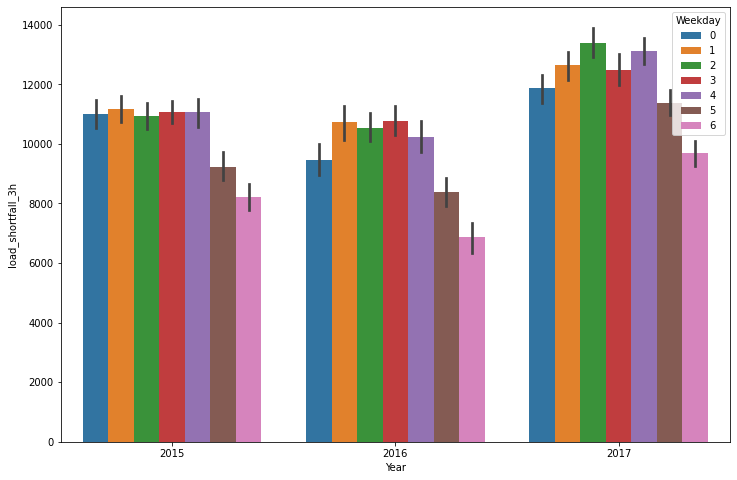

In [10]:
# multiple bar barchat showing the relationship of load shortfalls to Weekdays by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Weekday', data=train_clean_df, ax=ax)
plt.show()

The weekdays have been encoded as numbers. Monday is 0 while Sunday is 6. We can see a clear trend or pattern. We have the lowest shortfalls during the weekend while the middle of the week used to have the highesdt shortfalls. This is not surprising. 

### 4.6.3 Load shortfall by year and by hour

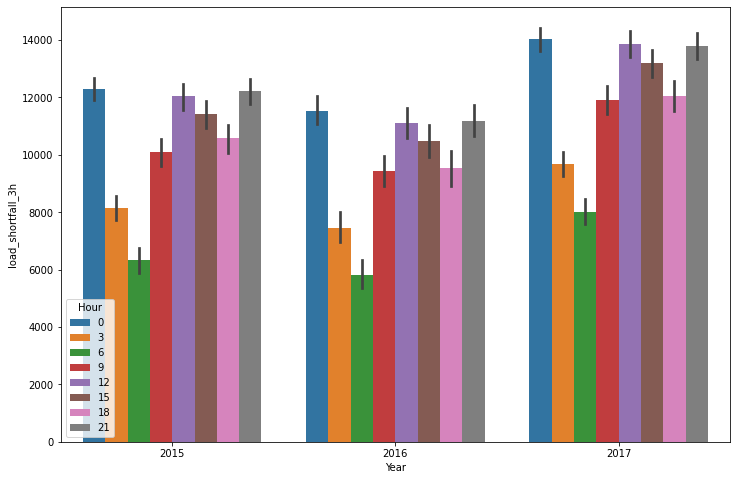

In [11]:
# multiple bar barchat showing the relationship of load shortfalls to months by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Hour', data=train_clean_df, ax=ax)
plt.show()

From the graph, 0 represents midnight and the numbers are 3 hourly. We can see that the highest shortfall occurs from the evening time. That is, from around 3 pm and increases until midnight. It then falls after midnight. This could be related to wind pressure and sunlight. During these times, pressure is usually low and it is dark, so wind energy and solar energy generation would tend to be low. But we don't understand why there is lesser shortfall just after midnight. Maybe because the demand for energy is low when people are sleeping. 

### 4.6.4 Load Shortfall in relation to Valencia Wind Degree

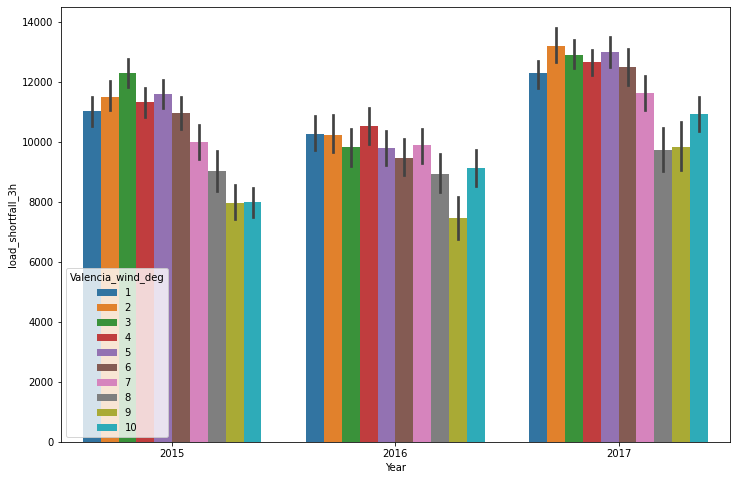

In [12]:
# multiple bar barchat showing the relationship of load shortfalls to valencia wind degree
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Valencia_wind_deg', data=train_clean_df, ax=ax)
plt.show()

From the graph, low levels of wind degree have higher levels of shortfalls. The shortfall in relation to wind degree was more prominent in Valencia in 2017.

### 4.6.5 Load Shortfall in relation to Seville Pressure

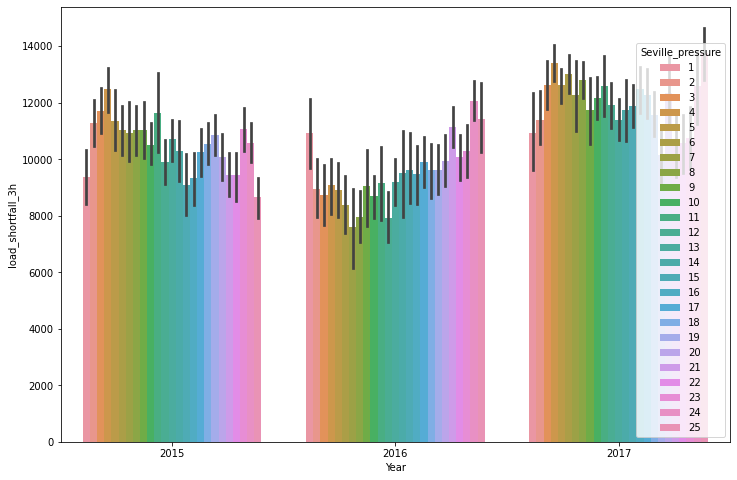

In [13]:
# multiple bar barchat showing the relationship of load shortfalls to seville pressure
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Seville_pressure', data=train_clean_df, ax=ax)
plt.show()

We can see from the graph above that extremes of pressure results in higher energy shortfalls in Spain. Low pressures and very high pressures tend to increase the energy shortfall. 

### 4.6.6 Univariate Analysis - Non-graphical
We will be looking at the descriptive statistics of each feature like the mean, standard deviation and five number summary of each feature. The five number summary are the min, max, median, 1st and 3rd quartiles. 

In [14]:
# the five number summary with the mean and standard deviation
train_clean_df.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612,2016.000571,6.524820,3.005478,10.498459
std,1.850371,2.877642,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404,0.816054,3.447976,1.999193,6.874031
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000,2015.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333,2015.000000,4.000000,1.000000,4.500000
50%,2.000000,5.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667,2016.000000,7.000000,3.000000,9.000000
75%,3.333333,8.000000,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667,2017.000000,10.000000,5.000000,15.000000
max,13.000000,10.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000,2017.000000,12.000000,6.000000,21.000000


Let's take a measure of skew in the data. We want to see how symmetrical the data is to give us a sense of whether they would follow a normal distribution. 

In [15]:
train_clean_df.skew()

Madrid_wind_speed        1.441144
Valencia_wind_deg        0.088354
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_pressure        -0.086022
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -2.121882
Seville_temp_max        -0.033931
Madrid_pressur

We notice that most of the features are fairly symmetrical. But there are extremes of positive skew like the snow features for Bilbao and Valencia, and the rain features for Seville, Barcelona and Madrid and pressure features for Barcelona. It must be due to extreme weather at these places which could be due to climate change. We expect that there would be high energy shortfalls due to this conditions. 

Now let's look for the presence of outliers in the features. Outlier detection is very important because we need to have standardized ranges for all the features. 

In [16]:
train_clean_df.kurtosis()

Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.186661
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_pressure          -1.220040
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3

From the output above, it is noticed that less than 20 percent of the features have significant outliers. That is a good start. But that means the data set would have to be standardized to accomodate for these outliers so they do not influence the modeling process. 

### 4.6.7 Univariate Analysis: Graphical

it would be insightful to take a subset of the weather conditions in each of the cities. There are five cities and sometimes three for each weather condition. Let's do the plotting for them. 

#### Wind speed

Spain uses a lot of wind energy so it would be insightful to get a look at the data for wind speed because wind speed determines whether the energy infrastructure can work at full capacity or not. 

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>],
       [<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:>]], dtype=object)

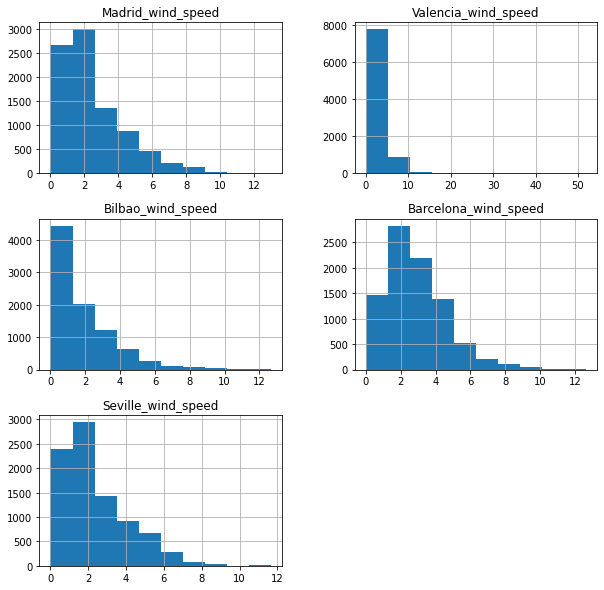

In [17]:
# Histogram of wind speed for five cities: Madrid, Valencia, Bilbao, Barcelona, and Seville
features = ["Madrid_wind_speed", "Valencia_wind_speed", "Bilbao_wind_speed", "Barcelona_wind_speed", "Seville_wind_speed"]
train_clean_df[features].hist(figsize=(10,10))

From the histogram, we see that the means are higher than the modes. Valencia_wind_speed is an encoded feature so ignore it. Also, wind speed is a positively skewed feature. That means, most of the values are concentrated to the right of the mode and tends to be high. 

### Rain 

Since Spain also uses solar energy for energy generation, let's take a look at the histogram for rainfall. Rainfall significantly affects the generation of both wind and solar energy. We could derive some insights from it. 

array([[<AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_3h'}>],
       [<AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_rain_1h'}>]], dtype=object)

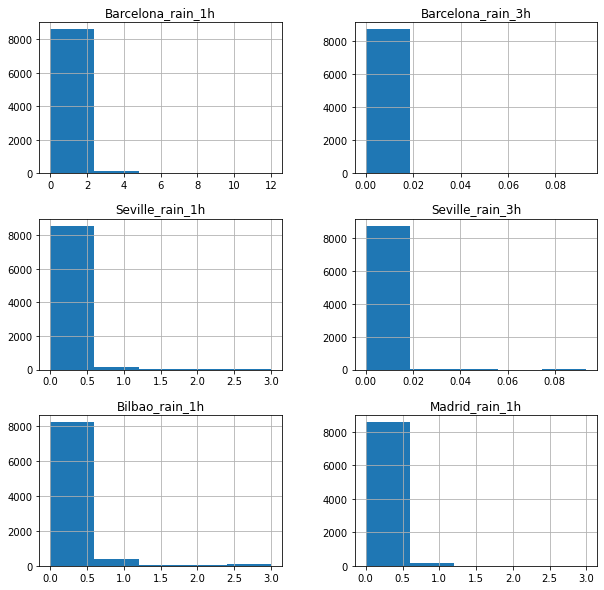

In [18]:
features = ["Barcelona_rain_1h", "Barcelona_rain_3h", "Seville_rain_1h", "Seville_rain_3h", "Bilbao_rain_1h", "Madrid_rain_1h"]
train_clean_df[features].hist(figsize=(10,10), bins=5)

From the histogram, we see that rainfall is constant in all four regions, except for some occasions when there are extremes of rainfall. 

### 4.6.8 Multivariate Analysis - Non-Graphical

We will conduct a non-graphical multivariate analysis because the features are many (51)

In [19]:
# Taking a correlation coefficient of all the features to check for collinearity
train_clean_df.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
Madrid_wind_speed,1.000000,0.121835,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981,-0.031553,-0.237445,-4.042128e-04,1.862275e-01
Valencia_wind_deg,0.121835,1.000000,0.199288,0.292731,0.240007,0.253549,0.158266,0.075864,0.085519,0.157252,...,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.188674,-0.057513,-0.140195,1.306817e-02,-1.384151e-01
Bilbao_rain_1h,0.259719,0.199288,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510,-0.200747,-0.188274,3.232531e-02,5.452669e-02
Valencia_wind_speed,0.513092,0.292731,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791,-0.012650,-0.237156,1.896518e-02,2.041029e-01
Seville_humidity,-0.117892,0.240007,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290,-0.045730,-0.111622,8.265003e-03,-4.249821e-01
Madrid_humidity,-0.137092,0.253549,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536,-0.084456,-0.076567,4.108225e-03,-3.078718e-01
Bilbao_clouds_all,0.244001,0.158266,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293,-0.031658,-0.117452,3.834215e-02,-2.371425e-02
Bilbao_wind_speed,0.377854,0.075864,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602,0.082611,-0.086698,-9.542737e-03,1.978484e-01
Seville_clouds_all,0.191251,0.085519,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804,-0.089657,-0.170345,1.771258e-02,-1.740111e-02
Bilbao_wind_deg,0.270950,0.157252,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800,-0.104647,-0.174941,7.095492e-03,1.104574e-01


I noticed that temparature and humidity have high correlation in the data set. 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## 5.1 Multiple Linear Regression Model

We will start with one of the basic models, a multivariate linear regression model.

In [20]:
# import regression module
from sklearn.linear_model import LinearRegression

In [21]:
# split predictors and response
X = train_clean_df.drop(['load_shortfall_3h'], axis=1)
y = train_clean_df['load_shortfall_3h']

In [22]:
# create model object
mlr = LinearRegression()

In [23]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [24]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42, shuffle=False)

In [25]:
# train model
mlr.fit(X_train, y_train)

LinearRegression()

Evaluating Model Performance

We have now trained the model and it's ready to predict. Let's evaluate model performance

In [26]:
from sklearn import metrics
import math

In [29]:
# mean square error of the train
mse_mlr_train = metrics.mean_squared_error(y_train, mlr.predict(X_train))
mse_mlr_train

22151239.82844906

In [30]:
pickle_dict = {}
pickle_dict["mse_mlr_train"] = mse_mlr_train

In [32]:
# mean squared error of test. This is to confirm overfitting
mse_mlr_test = metrics.mean_squared_error(y_test, mlr.predict(X_test))
mse_mlr_test

23621551.184521716

In [33]:
pickle_dict['mse_mlr_test'] = mse_mlr_test

In [34]:
# root mean square error for fit accuracy
rmse_mlr = np.sqrt(mse_mlr_test)
rmse_mlr

4860.200735002796

In [35]:
pickle_dict['rmse_mlr'] = rmse_mlr

In [52]:
pickle_dict.keys()

dict_keys(['mse_mlr_train', 'mse_mlr_test', 'rmse_mlr'])

In [53]:
pickle_dict['mlr'] = mlr

In [57]:
 pickle_dict['test_clean_df'] = test_clean_df

In [58]:
pickle_dict['train_clean_df'] = train_clean_df

In [59]:
pickle_dict.keys()

dict_keys(['mse_mlr_train', 'mse_mlr_test', 'rmse_mlr', 'mlr', 'test_clean_df', 'train_clean_df'])

Now that the model and associated data has been put into a dictionary, let me rest for some time before continuing the work. I will now pickle it. 

In [60]:
import pickle

model_save_path = "saved_mlr.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(pickle_dict,file)

In [4]:
# unpickling the model so we can continue from last time
import pickle
model_load_path = "saved_mlr.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [5]:
# getting back our data set
train_clean_df = unpickled_model['train_clean_df']
test_clean_df = unpickled_model['test_clean_df']

# Ridge Regression Model

In [6]:
# Split data into predictors and response
X = train_clean_df.drop('load_shortfall_3h', axis=1)
y = train_clean_df['load_shortfall_3h']

Regularisation is important in Ridge regression so we scale our data. 

In [7]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [8]:
# Create scaler object
scaler = StandardScaler()

In [9]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [10]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Weekday,Hour
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.226179,-1.602429,-0.00274,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.226179,-1.602429,-0.00274,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.226179,-1.602429,-0.00274,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.226179,-1.602429,-0.00274,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.226179,-1.602429,-0.00274,0.654899


We'll now split our data into train-test parts for applying the ridge regression.

In [11]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [12]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=False, 
                                                    random_state=42)

In [13]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [14]:
# Create ridge model
ridge = Ridge()

In [15]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

Assessing the predictive accuracy of our model

In [16]:
# Import metrics module
from sklearn import metrics

In [17]:
# check training predict
y_predict_ridge_train = ridge.predict(X_train)

In [18]:
# calculate training mse
mse_ridge_training = metrics.mean_squared_error(y_train, y_predict_ridge_train)
mse_ridge_training

22153526.55399076

In [19]:
# store in dictionary because of pickling
ridge_dict = {}
ridge_dict['mse_ridge_training'] = mse_ridge_training

In [20]:
# check test predict
y_predict_ridge_test = ridge.predict(X_test)

In [21]:
# calculate test mse
mse_ridge_test = metrics.mean_squared_error(y_test, y_predict_ridge_test)
mse_ridge_test

23540571.133834872

In [22]:
# store in pickling dictionary
ridge_dict['mse_ridge_test'] = mse_ridge_test

In [23]:
# calculate rmse on the ridge model
rmse_ridge = np.sqrt(mse_ridge_test)
rmse_ridge

4851.862645812933

In [24]:
# store in pickling dictionary
ridge_dict['rmse_ridge'] = rmse_ridge

In [28]:
#join both dictionaries
summed_dict = dict(unpickled_model, **ridge_dict)
summed_dict.keys()

dict_keys(['mse_mlr_train', 'mse_mlr_test', 'rmse_mlr', 'mlr', 'test_clean_df', 'train_clean_df', 'mse_ridge_training', 'mse_ridge_test', 'rmse_ridge'])

In [38]:
summed_dict['ridge'] = ridge

In [39]:
summed_dict.keys()

dict_keys(['mse_mlr_train', 'mse_mlr_test', 'rmse_mlr', 'mlr', 'test_clean_df', 'train_clean_df', 'mse_ridge_training', 'mse_ridge_test', 'rmse_ridge', 'ridge'])

After the ridge regression, we see improvement in the modeling accuracy. Ridge regression gave a lower RMSE score than multivariate linear regression. But due to overfitting, it gave a lower score on the unseen data. 

saving the dict for pickling

In [40]:
import pickle

model_save_path = "saved_ridge.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(summed_dict,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic